In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.colors as colors
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


# 1.

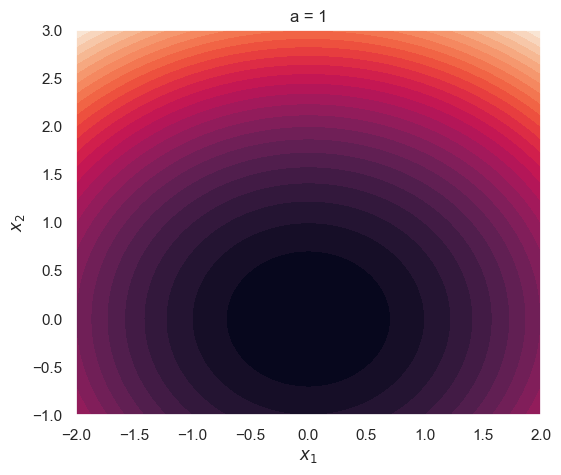

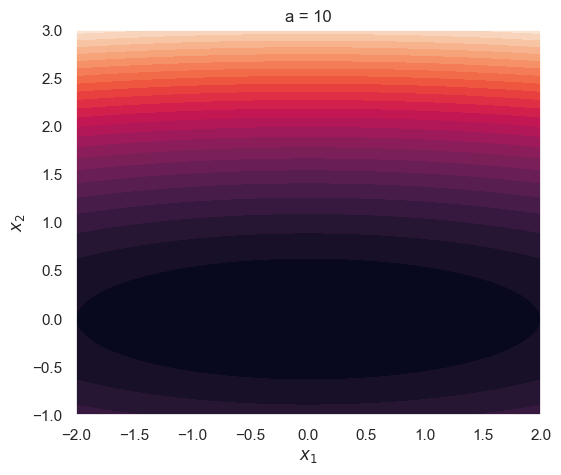

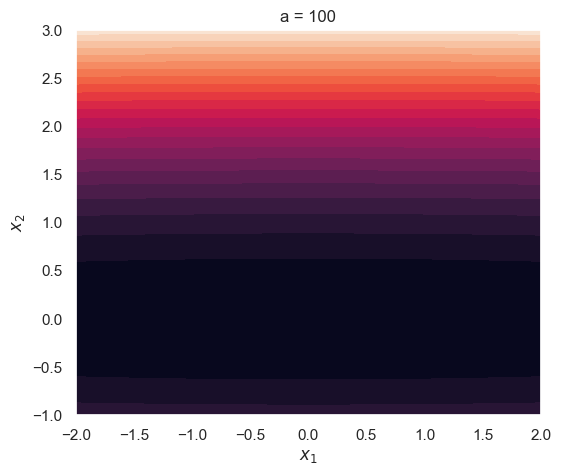

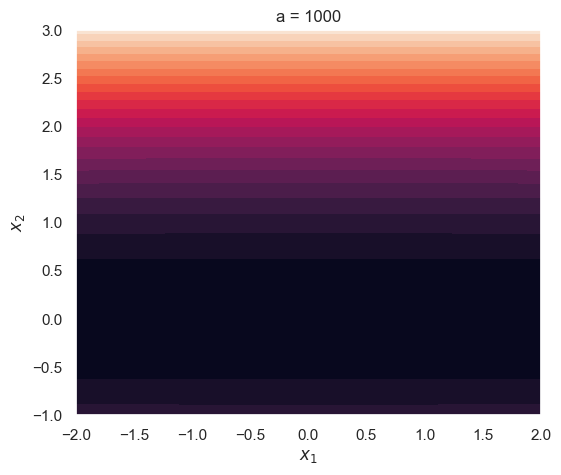

In [2]:
def f(x, a):
    return (x[0])**2 + a*(x[1])**2

a_values = [1, 10, 100, 1000]
x,y = np.linspace(-2, 2, 100), np.linspace(-1, 3, 100)
x_mesh, y_mesh = np.meshgrid(x,y)
for a in a_values:

    z = [[f([xval, yval],a) for xval in x] for yval in y]

    plt.figure(figsize=(6,5))
    plt.title(f"a = {a}")
    plt.contourf(x_mesh, y_mesh, z, levels=25)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


# 2.

In [12]:
def grad_rossenbrock(x, a):
    x_tensor = torch.tensor(x, requires_grad=True)
    #evaluate the function
    out = f(x_tensor,a) 
    #.backward() computes the gradient
    out.backward() 
    return x_tensor.grad


def gradient_descent_rossenbrock(x0, gamma, max_itrs, a):
    '''Run gradient descent with initial point x0
    and constant step length gamma'''
    x = x0
    for itr in range(max_itrs):
        x -= gamma*grad_rossenbrock(x,a).numpy()
        print(f"iteration {itr}: x={x}")
    return x


for a in a_values:
    print(f"\nRunning descent for a = {a}")
    gradient_descent_rossenbrock(np.array([1.0, 1.0]), .025, 100, a)


Running descent for a = 1
iteration 0: x=[0.95 0.95]
iteration 1: x=[0.9025 0.9025]
iteration 2: x=[0.857375 0.857375]
iteration 3: x=[0.81450625 0.81450625]
iteration 4: x=[0.77378094 0.77378094]
iteration 5: x=[0.73509189 0.73509189]
iteration 6: x=[0.6983373 0.6983373]
iteration 7: x=[0.66342043 0.66342043]
iteration 8: x=[0.63024941 0.63024941]
iteration 9: x=[0.59873694 0.59873694]
iteration 10: x=[0.56880009 0.56880009]
iteration 11: x=[0.54036009 0.54036009]
iteration 12: x=[0.51334208 0.51334208]
iteration 13: x=[0.48767498 0.48767498]
iteration 14: x=[0.46329123 0.46329123]
iteration 15: x=[0.44012667 0.44012667]
iteration 16: x=[0.41812034 0.41812034]
iteration 17: x=[0.39721432 0.39721432]
iteration 18: x=[0.3773536 0.3773536]
iteration 19: x=[0.35848592 0.35848592]
iteration 20: x=[0.34056163 0.34056163]
iteration 21: x=[0.32353354 0.32353354]
iteration 22: x=[0.30735687 0.30735687]
iteration 23: x=[0.29198902 0.29198902]
iteration 24: x=[0.27738957 0.27738957]
iteration 2

In [8]:
print("The larger the a value gets, the smaller the gamma value has to be. I tried using a gamma that could show performance for all a values, but it was impossible. The steps between each a value become very inconsistent. At a=1000 the values become extremely small after just 2 to 3 iterations and a=100 and 1000 the second value alternates between positive and negative")

The larger the a value gets, the smaller the gamma value has to be. I tried using a gamma that could show performance for all a values, but it was impossible. The steps between each a value become very inconsistent. At a=1000 the values become extremely small after just 2 to 3 iterations and a=100 and 1000 the second value alternates between positive and negative


# 3. 

In [47]:
#Now onto stochastic gradient descent.
np.random.seed(0) #make random results reproducible
n = 100000 #be careful about increasing this.
p = 1000
x = np.random.normal(0, 1, size=(n,p))
theta_true = np.random.normal(0, 1, size = p) #this is the thing we want to estimate
#construct the ys by adding random noise
y = x @ theta_true + np.random.normal(0, 2, size=n)

#convert everything to pytorch tensors
x, y, theta_true = torch.from_numpy(x), torch.from_numpy(y), torch.from_numpy(theta_true)

#After genertion, split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
#not using this split data or the non torch SGD anymore. Using example from lecture now


In [48]:
#another way to do the above problem using Pytorch's tools
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader, random_split

gamma = 1e-3
batch_size = 64
data = TensorDataset(x, y)
train_data, test_data = random_split(data, (round(.8*len(data)), len(data) - round(.8*len(data))))
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)
traindata_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testdata_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

theta = torch.zeros(p, requires_grad=True, dtype=torch.double)
optimizer = SGD([theta,], lr=gamma) #Note that this samples WITHOUT replacement, unlike the version above.
num_epochs = 15 #number of times to cycle through all the data
for epoch in range(num_epochs):
    for i, (this_x, this_y) in enumerate(traindata_loader):
        loss = torch.mean((this_x @ theta - this_y)**2) #compute loss
        loss.backward() #compute gradient
        optimizer.step() #take one step of stochastic gradient descent
        optimizer.zero_grad() #zero out the gradient
        if i%250 == 0:
            print(f"epoch: {epoch}. itr: {i}. ||theta - theta_true||={torch.linalg.norm(theta - theta_true)} || MSE: {loss}")

epoch: 0. itr: 0. ||theta - theta_true||=32.62234613617216 || MSE: 1039.7275324471545
epoch: 0. itr: 250. ||theta - theta_true||=19.88198792002849 || MSE: 324.1061019334278
epoch: 0. itr: 500. ||theta - theta_true||=12.021148352760827 || MSE: 128.43561435571436
epoch: 0. itr: 750. ||theta - theta_true||=7.3170628871558865 || MSE: 58.39900887873996
epoch: 0. itr: 1000. ||theta - theta_true||=4.419201572748626 || MSE: 19.19361206608254
epoch: 1. itr: 0. ||theta - theta_true||=2.692157589010324 || MSE: 11.82519822575554
epoch: 1. itr: 250. ||theta - theta_true||=1.711172597000048 || MSE: 6.4209262173612505
epoch: 1. itr: 500. ||theta - theta_true||=1.084158903572717 || MSE: 5.256424817025353
epoch: 1. itr: 750. ||theta - theta_true||=0.7085238809098038 || MSE: 2.911200417372316
epoch: 1. itr: 1000. ||theta - theta_true||=0.4896729671531503 || MSE: 2.914363608197424
epoch: 2. itr: 0. ||theta - theta_true||=0.37059550091154864 || MSE: 3.1649955390090714
epoch: 2. itr: 250. ||theta - theta_t

In [54]:
#for epoch in range(num_epochs):
# To get MSE (from lecture)
test_se = 0
for i, (this_x, this_y) in enumerate(testdata_loader):
    test_se += ((this_x @ theta - this_y)**2).sum() #compute loss
#print(f"Test MSE: {(test_se/len(test_data)).item()}")
#torch_mse = (test_se/len(test_data)).item()

In [50]:
from sklearn.linear_model import LinearRegression
#All commented out stuff is what I used before lecture 
reg = LinearRegression(fit_intercept = False).fit(train_data.dataset.tensors[0].numpy(), train_data.dataset.tensors[1].numpy())
#reg.score(X_train, y_train)

from sklearn.metrics import mean_squared_error
sk_mse = np.mean((reg.predict(test_data.dataset.tensors[0].numpy()) - test_data.dataset.tensors[1].numpy())**2)
#y_true = X_train @ theta_true + np.random.normal(0, 2, size=int(n*.8))
#sklearn_mse = mean_squared_error(y_test, pred)
sklearn_coef = reg.coef_
#print(sklearn_mse)
#print(sklearn_coef)

In [51]:
print(f"Torch MSE: {torch_mse}\nSkLearn MSE: {sk_mse}\n")
print("The MSE between both models is fairly similar. Upon multiple runs, the MSE would fluctuate. So it depends on the iterations/epochs for torch and general randomness ")


Torch MSE: 4.0433982007213825
SkLearn MSE: 3.9391764631473554

The MSE between both models is fairly similar. Upon multiple runs, the MSE would fluctuate. So it depends on the iterations and batch sizes for SGD  


In [53]:
print(torch.linalg.norm(torch.from_numpy(sklearn_coef) - theta_true))

print("\nsklearn actually has a closer estimate of the coef")

tensor(0.2004, dtype=torch.float64)

sklearn actually has a closer estimate of the coef
